(ch:smapling)=
# 모집단과 표본

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

추측통계의 기본 개념을 소개한다.

- 모집단과 표본
- 무작위 추출 대 층화표집

## 모집단

모집단<font size='2'>population</font>은 통계적 성질을 알고자 하는 관측 대상들의 집단 전체를 가리킨다.
반면에 표본<font size='2'>sample</font>은 관측 대상 중에 실제로 측정된 또는 관찰된 결과들의 집합이다.
표본추출<font size='2'>sampling</font>은 모집단에서 표본을 선택하는 과정이다.

표본추출을 통해 얻어진 표본의 평균값, 분산 등이 (표본)통계량<font size='2'>statistic</font>이며,
모집단에 대한 평균값과 분산인 모평균, 모분산 등은 모수<font size='2'>parameter</font>라 부른다.
모수를 파악하는 일은 일반적으로 매우 어렵거나 불가능하다.
따라서 표본통계량을 이용하여 모수를 추정하며,
이런 의미에서 표본평균, 표본분산 등을 모수에 대한 추정값으로 부른다.
이런 과정을 통틀어 추측통계<font size='2'>inferential statistics</font>라 부른다.
아래 그림이 추측통계의 주요 개념인 모집단, 표본, (표본)통계량, 모수의 관계를 잘 설명한다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch04/img-4-1.jpg?raw=true" style="width:600px"></div></p>

### 모집단

모집단과 표본을 설명하기 위해 캘리포니아 주택가격 데이터를 모집단으로 예제로 활용한다.

**캘리포니아 주택가격 데이터셋**

1990년도에 시행된 미국 캘리포니아 주의 20,640개 구역별 주택가격 데이터셋은
구역별로 경도, 위도, 주택 건물 중위연령, 총 방 수, 총 침실 수, 인구, 가구수, 가구중위소득, 주택중위가격, 해안근접도
등 총 10개의 **특성**<font size='2'>feature</font>을 포함하는 인구조사 자료다. 
참고로 통계 분야에서는 특성을 변수 또는 변인 등으로 부르지만 머신러닝 분야에서는 특성이라 부르는 게 일반적이다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/LA-USA01.png" width="600"></div></p>

**데이터 구하기**

많은 곳에서 구할 수 있지만 여기서는 데이터 기본저장소에서 csv 파일을 데이터프레임으로 불러온다.

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**데이터 정보 요약**

* 20,640 개 구역별로 10개의 항목 조사
* 해안 근접도를 뜻하는 `ocean_proximity` 특성은 **범주형**<font size='2'>categorical</font>이고 
    나머지는 **수치형**<font size='2'>numerical</font> 특성임.
    - 특성의  `Dtype`이 `object`: 범주형 데이터
    - 특성의  `Dtype`이 `float64`: 수치형 데이터
* 총 방 수를 뜻하는 `total_bedrooms` 특성은 207개의 null 값, 즉 결측치 포함.

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**가구중위소득과 주택중위가격**

10개 특성 중에서 여기서는 가구중위소득과 주택중위가격 특성만 이용한다.

In [9]:
housing = housing.loc[:, ['median_income', 'median_house_value']]

In [10]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


**산점도 확인**

소득이 많을수록 보다 비싼 집에 사는 경향이 크다는 측면에서 보았을 때
주택중위가격과 가구중위소득간의 관계가 밀접할 밖에 없다.
이점을 산점도를 이용하여 확인해본다.

데이터프레임은 matploblib 라이브러리를 활용하여 자체적으로 그래프를 그리는 기능을 제공한다.
아래 코드는 두 특성을 이용하여 산점도를 그린다.

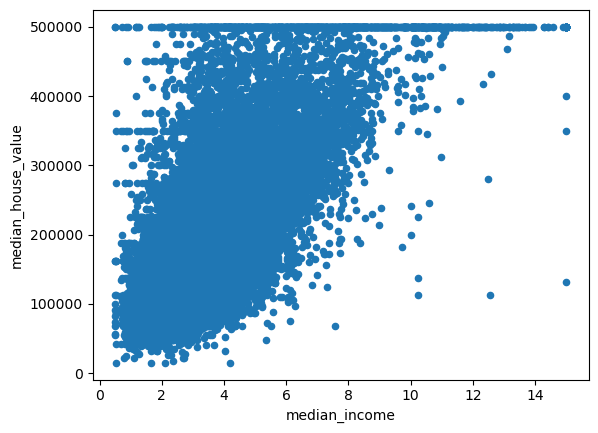

In [11]:
housing.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

주택중위가격이 500,000 정도인 경우에 직선 형태의 산포도가 보이는데, 매우 부자연스럽다.
어떤 이유에서인지 알아보기 위해 데이터분포를 확인해본다.

In [12]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


중위주택가격의 최댓값이 500,001인데 자연스럽지 못하다.
아마도 50만 달러 이상은 50만1 달러로 지정한 것으로 보인다.
따라서 이런 데이터는 부자연스럽다는 측면에서 이상치로 고려될 수 있기에
여기서는 데이터셋에서 제거한다.

### 데이터 이상치 제거

주택중위가격이 50만 달러를 초과하는 경우 데이터에서 삭제하기 위해 부울 인덱싱을 활용한다.

**부울 인덱싱**

부울 인덱싱<font size='2'>Boolean indexing</font>은
`True` 또는 `False`의 진리값으로만 구성된 어레이 또는 데이터프레임을 이용하여
`True`에 해당하는 행 또는 열만 남기고 나머지는 제거하는 기법이다.
부울 인덱싱에 사용되는 진리값으로만 구성된 1차원 어레이 형식의 리스트, 어레이, 데이터프레임을
마스크<font size='2'>mask</font>라 부른다.

주택중위가격이 50만 달러를 초과하는 구역을 삭제하기 위해 
먼저 주택중위가격이 50만 달러를 초과하는 경우에만 `True` 값을 갖는 시리즈를 지정한다. 

In [13]:
house_value_max = housing['median_house_value'].max() # 500,001

mask = housing['median_house_value'] >= house_value_max

`mask`가 가리키는 어레이에 총 965개의 `True`가 포함되어 있다.

In [14]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [15]:
mask.sum()

965

이제 50만 달러 이하의 경우만 남기기 위해 `mask`를 다음과 같이 이용한다.
참고로 물결 기호, 영어로 틸데<font size='2'>tilde</font> 기호 `~`는 부정 논리연산자를 가리킨다.

In [16]:
housing = housing[~mask]

In [17]:
housing.shape

(19675, 2)

이상치가 제거된 데이터셋의 산점도를 확인하면 이전과 많이 달라졌음이 확인된다.

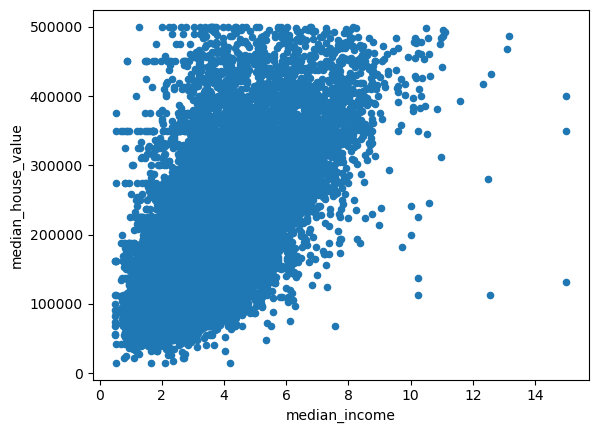

In [18]:
housing.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

**인덱스 초기화**

965개의 이상치가 제거되면서 인덱스와 데이터셋의 크기가 매칭되지 않는다. 

In [19]:
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


따라서 인덱스를 초기화하여 인덱스가 0부터 19,674까지의 정수로 지정되도록 한다.

In [20]:
housing = housing.reset_index(drop=True)

인덱스의 이름으로 구역을 의미하는 `district`를 지정한다.

In [21]:
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


## 표본

19,675개 구역의 10%에 해당하는 1,968개 구역의 데이터를 선택하여 표본으로 지정한다.
표본추출은 보통 무작위 추출 방식으로 진행되지만 경우에 따라 층화표집도 활용된다.

### 무작위 추출

무작위 추출은 모집단에서 임의로 하나의 값을 선택하는 방법이다.
아래 코드는 `housing`에 포함된 전체 구역의 10%를 무작위로 선택하기 위해
데이터프레임의 `sample()` 메서드를 호출한다.

In [22]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value
district,,
14447,1.8357,104200.0
13921,4.2109,171200.0
12981,4.0481,97300.0
2579,3.5380,102700.0
12162,2.2000,116500.0
...,...,...
19377,6.6246,284200.0
485,2.9405,289500.0
5018,1.6027,97300.0


:::{admonition} 시드<font size='2'>seed</font>
:class: note

`sample()` 메서드의 `random_state=42`는 무작위 선택의 시드<font size='2'>seed</font>를 지정한다.
넘파이의 경우 `np.random.seed()` 함수를 이용하여 시드를 지정한다.
시드를 지정하지 않으면 아래 코드를 실행할 때마다 다른 값이 생성된다.
시드는 0을 포함하여 임의의 양의 정수가 사용된다.
:::

**표본통계량 vs. 모수**

무작위로 선택된 1,968개 샘플들의 기초 통계정보는 다음과 같다.

In [23]:
random_stats = random_sampling.describe()
random_stats

,median_income,median_house_value
count,1968.000000,1968.000000
mean,3.704548,193884.552846
std,1.592444,101361.586513
min,0.499900,26900.000000
25%,2.542675,115575.000000
50%,3.471250,171300.000000
75%,4.625000,254100.000000
max,15.000100,500000.000000


모수, 즉 모집단의 통계량과 비슷하지만 약간 다르다.

In [24]:
housing_stats = housing.describe()
housing_stats

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


분산 또한 표본과 모집단의 정보가 조금 다르다.
앞서 설명한 대로 표본의 불편분산이 표본의 (편향)분산보다 조금 더 크다.

- 표본의 불편분산

In [25]:
random_sampling.var()

median_income         2.535877e+00
median_house_value    1.027417e+10
dtype: float64

- 표본의 편향분산

In [26]:
random_sampling.var(ddof=0)

median_income         2.534588e+00
median_house_value    1.026895e+10
dtype: float64

그런데 두 경우 모두 모분산에 크게 나왔다.
모집단의 경우엔 편향분산을 사용해야 함에 주의한다.

- 모집단의 (편향)분산

In [27]:
housing.var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

하지만 이는 하나의 표본에 대한 결과이며 표본을 다르게 하면 다른 결과가 나온다.
예를 들어 아래 코드는 무작쉬 시드를 0으로 지정했을 때의 결과를 보여준다.

In [28]:
random_sampling = housing.sample(frac=0.1, random_state=0)
random_sampling.var()

median_income         2.416924e+00
median_house_value    9.515082e+09
dtype: float64

표본 불편분산의 기댓값은 모분산이다.
기댓값<font size='2'>expectation value</font>은
어떤 확률적 사건의 평균값이다.
자세한 설명은 [표본분산의 기댓값](https://hsm-edu.tistory.com/15)을 참고한다.

아래 코드는 시드를 달리 하면서 10만번 표본을 추출했을 때
불편분산의 평균값을 계산한다.

In [29]:
trial = 10000
vars = np.zeros((trial, 2))
for seed in range(trial):
    random_sampling = housing.sample(frac=0.1, random_state=seed)
    var_income, var_value = random_sampling.var()
    vars[seed] = var_income, var_value

vars.mean(axis=0)

array([2.466038e+00, 9.548072e+09])

반면에 아래 코드는 편향분산을 계산한다.

In [30]:
trial = 10000
vars = np.zeros((trial, 2))
for seed in range(trial):
    random_sampling = housing.sample(frac=0.1, random_state=seed)
    var_income, var_value = random_sampling.var(ddof=0)
    vars[seed] = var_income, var_value

vars.mean(axis=0)

array([2.464785e+00, 9.543221e+09])

실험 결과 불편분산의 평균값이 모분산에 보다 가까운 근사값으로 확인된다.

### 층화표집

주택가격은 소득과 밀접하게 연관된다.
따라서 주택가격에 대한 표본통계량을 확인하고자 할 때
표본이 소득별로 적절한 비율을 유지하는지 확인할 필요가 있다.

**소득 범주 지정**

중위소득을 아래 표에 언급된 5개 구간으로 쪼개면서 동시에 1부터 5까지의 정수를 구간 이름으로 지정한다.

| 구간 | 범위 |
| :---: | :--- |
| 1 | 0.0 - 1.5 |
| 2 | 1.5 - 3.0 |
| 3 | 3.0 - 4.5 |
| 4 | 4.5 - 6.0 |
| 5 | 6.0 -  |

아래 코드는 `pd.cut()` 함수를 이용하여
구역의 중위소득을 모두 주어진 기준에 따라 설정된 구간에 할당한 결과를 보여준다.

In [31]:
pd.cut(housing["median_income"],
       bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
       labels=[1, 2, 3, 4, 5])

district
0        5
1        5
2        5
3        4
4        3
        ..
19670    2
19671    2
19672    2
19673    2
19674    2
Name: median_income, Length: 19675, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

이제 구역의 중위소득 범주를 새로운 특성으로 추가한다.

In [32]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
district,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
19670,1.5603,78100.0,2
19671,2.5568,77100.0,2
19672,1.7000,92300.0,2


**데이터프레임 `groupby()` 메서드 활용**

중위소득 구간별로 지정된 비율의 표본을 추출하려 한다.
이를 위해 데이터프레임의 `groupby()` 메서드를 활용한다.

데이터프레임의 `groupby()` 메서드는 지정된 구간을 기준으로 데이터를 그룹화한다.
아래 코드는 `income_cat` 특성에 포함된 소득 범주 값들을 기준으로 소득 범주별로 데이터를 묶는다,
즉 5개의 그룹으로 묶는다.

In [33]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

생성된 `DataFrameGroupBy` 객체는 내부를 바로 보여주지는 않는다.

In [34]:
type(stratification)

pandas.core.groupby.generic.DataFrameGroupBy

In [35]:
print(stratification)

하지만 내부적으로 아래 그림처럼 `income_cat`의 값에 따라 5개의 그룹으로 분류되어 있다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/groupby-1.png" style="width:360px"></div></p>

참고로 위 사진의 내용은 아래 코드처럼 `for` 반복문을 이용하여 확인할 수도 있지만,
그보다는 위 사진처럼 그룹화가 이루어진다는 것을 기억해두어야 한다.

코드에 사용된 `break` 명령문은 처음 두 개의 그룹만 화면에 출력하기 위함이다.
해당 `if` 조건문을 제거하면 5개의 그룹이 모두 출력된다. 

In [36]:
for name, group in stratification:
    print(f"그룹 {name}")
    print("---")
    print(group)
    print() # 한 칸 띄우기 용도
    if name == 2:
        break

그룹 1
---
          median_income  median_house_value income_cat
district                                              
20               1.3578            147500.0          1
33               1.3750            104900.0          1
35               1.4861             97200.0          1
36               1.0972            104500.0          1
37               1.4103            103900.0          1
...                 ...                 ...        ...
19638            1.3375             59600.0          1
19645            1.3631             45500.0          1
19646            1.2857             47000.0          1
19647            1.4934             48300.0          1
19648            1.4958             53400.0          1

[814 rows x 3 columns]

그룹 2
---
          median_income  median_house_value income_cat
district                                              
8                2.0804            226700.0          2
13               2.6736            191300.0          2
14               1.916

`groupby()` 메서드에 의해 생성된 객체는 `DataFrameGroupBy` 자료형이며,
객체에 포함된 각각의 그룹에 대해 적용되는 다양한 통계 메서드를 제공한다.

- `count()` 메서드: 그룹별 도수(항목수) 계산

In [37]:
stratification.count()

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


- `sum()` 메서드: 그룹별 모든 값들의 합 계산

In [38]:
stratification.sum()

,median_income,median_house_value
income_cat,,
1,988.6214,8.816690e+07
2,15234.0468,8.840968e+08
3,26161.8582,1.377902e+09
4,17960.4249,8.714170e+08
5,11994.4543,5.654208e+08


- `mean()` 메서드: 그룹별 평균값 계산

In [39]:
stratification.mean()

,median_income,median_house_value
income_cat,,
1,1.214523,108313.143735
2,2.325099,134935.408730
3,3.683212,193988.680698
4,5.128619,248834.094803
5,7.038999,331819.718310


- `std()` 메서드: 그룹별 표준편차 계산

In [40]:
stratification.std()

,median_income,median_house_value
income_cat,,
1,0.233626,69314.530601
2,0.406648,69001.703453
3,0.426619,81583.050538
4,0.410023,80596.339192
5,1.070536,80536.125453


- `var()` 메서드: 그룹별 분산 계산

In [41]:
stratification.var()

,median_income,median_house_value
income_cat,,
1,0.054581,4.804504e+09
2,0.165363,4.761235e+09
3,0.182003,6.655794e+09
4,0.168119,6.495770e+09
5,1.146047,6.486068e+09


**`apply()` 메서드**

`DataFrameGroupBy` 자료형이 제공하지 않지만 그룹별로 하나의 값을 계산하려면
`apply()` 메서드를 이용한다.
예를 들어 아래 코드는 그룹별로 10%의 샘플을 무작위로 추출한다.

- 인자로 지정된 아래 무명함수는 `groupby()` 메서드로 생성된 각각의 그룹에서
    10% 크기의 표본을 무작위로 추출하는 데에 사용된다.

    ```python
    lambda y:y.sample(frac=0.1, random_state=42)
    ```

    즉, 무명함수의 매개변수 `y`는 각각의 그룹을 인자로 받는다.
    
- `include_groups=False)` 키워드 인자는 향후 출시될 Pandas 3.0 버전과의 호환을 위해 반드시 지정되어야 한다.

In [42]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.1, random_state=42), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat district                                   
1          4388             1.1868             93800.0
           13310            1.3811             51300.0
           3262             1.1650             53300.0
           4752             0.9234            187500.0
           12210            1.4861             63100.0
...                            ...                 ...
5          9672            13.1107            467600.0
           19432            6.0145            287100.0
           5824             7.0329            368300.0
           15710            6.4562            230000.0
           1542             8.1550            343700.0

[1966 rows x 2 columns]

총 1,966개 구역의 데이터를 담은 데이터프레임이 생성되었으며,
각 구역이 속한 소득 범주가 인덱스로 추가되었다.
즉, 위 데이터프레임은 `income_cat`과 `disstrict` 두 종류의 인덱스를 포함하는
다중 인덱스를 사용한다.

다중 인덱스는 인덱스 각각의 이름 또는 레벨 `level`로 구분된다.
레벨은 왼편에 위치한 인덱스부터 0, 1, 2, 등으로 지정된다.
여기서는 `income_cat`를 인덱스보다는 특성으로 사용하는 게 편하다.
아래 코드는 레벨을 이용하여 특정 인덱스를 특성으로 변환시키는 코드를 보여준다.

In [43]:
stratified_sampling = stratified_sampling.reset_index(level=0)
stratified_sampling

,income_cat,median_income,median_house_value
district,,,
4388,1,1.1868,93800.0
13310,1,1.3811,51300.0
3262,1,1.1650,53300.0
4752,1,0.9234,187500.0
12210,1,1.4861,63100.0
...,...,...,...
9672,5,13.1107,467600.0
19432,5,6.0145,287100.0
5824,5,7.0329,368300.0


반드시 필요한 일은 아니지만 
이전 데이터프레임과의 형식을 맞추기 위해 `income_cat` 특성을 오른쪽 끝으로 보낸다.

In [44]:
stratified_sampling = stratified_sampling[['median_income', 'median_house_value', 'income_cat']]
stratified_sampling

,median_income,median_house_value,income_cat
district,,,
4388,1.1868,93800.0,1
13310,1.3811,51300.0,1
3262,1.1650,53300.0,1
4752,0.9234,187500.0,1
12210,1.4861,63100.0,1
...,...,...,...
9672,13.1107,467600.0,5
19432,6.0145,287100.0,5
5824,7.0329,368300.0,5


아래 코드는 표본추출 결과를 소득 범주 기준으로 그룹화를 진행한 다음에 각 구간별로 선택된 샘플의 개수를 확인한다.

In [45]:
stratified_sampling_count = stratified_sampling.groupby('income_cat', observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,81,81
2,655,655
3,710,710
4,350,350
5,170,170


각 구간별 도수를 보면 모집단의 구간별 도수의 10%에 매우 가깝다는 것을 알 수 있다.

In [46]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


### 무작위 추출 vs. 층화표집

소득 범주 정보를 기억하면서 무작위 추출을 다시 진행하면
크기가 1,968인 표본이 생성된다.

In [47]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
district,,,
14447,1.8357,104200.0,2
13921,4.2109,171200.0,3
12981,4.0481,97300.0,3
2579,3.5380,102700.0,3
12162,2.2000,116500.0,2
...,...,...,...
19377,6.6246,284200.0,5
485,2.9405,289500.0,2
5018,1.6027,97300.0,2


소득 범주별 그룹의 크기를 확인한다.

In [48]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,87,87
2,644,644
3,702,702
4,347,347
5,188,188


**오차율 비교표**

무작위 추출과 층화표집의 결과를 소득 범주별 상대도수를 기준으로 비교한다.

- 두 표본의 크기: 모집단의 10%에 매우 근접한다.

In [49]:
random_total = random_sampling_count.sum()
random_total

median_income         1968
median_house_value    1968
dtype: int64

In [50]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         1966
median_house_value    1966
dtype: int64

- 소득 범주별 상대도수: 차이가 어느 정도 있다.

In [51]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.044207,0.044207
2,0.327236,0.327236
3,0.356707,0.356707
4,0.176321,0.176321
5,0.095528,0.095528


In [52]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.041200,0.041200
2,0.333164,0.333164
3,0.361139,0.361139
4,0.178026,0.178026
5,0.086470,0.086470


참고로 모집단에서의 소득 범주별 상대도수는 다음과 같다.

In [53]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


아래 코드는 두 표본과 모집단의 소득 범주별 상대도수를 하나로 묶어 데이터프레임을 생성한다.

In [54]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체', '층화표집', '무작위 추출']
proportions.index.name = '소득 범주'
proportions

,전체,층화표집,무작위 추출
소득구간,,,
1,0.041372,0.041200,0.044207
2,0.333011,0.333164,0.327236
3,0.361017,0.361139,0.356707
4,0.177992,0.178026,0.176321
5,0.086607,0.086470,0.095528


모집단의 소득 범주별 상대도수를 기준으로 표본 각각에서의 상대도수와의 오차율을 추가한다.

In [55]:
proportions["층화표집 오차율"] = (proportions["층화표집"] / proportions["전체"] - 1)
proportions["무작위 추출 오차율"] = (proportions["무작위 추출"] / proportions["전체"] - 1)

proportions

,전체,층화표집,무작위 추출,층화표집 오차율,무작위 추출 오차율
소득구간,,,,,
1,0.041372,0.041200,0.044207,-0.004155,0.068525
2,0.333011,0.333164,0.327236,0.000457,-0.017344
3,0.361017,0.361139,0.356707,0.000340,-0.011936
4,0.177992,0.178026,0.176321,0.000191,-0.009389
5,0.086607,0.086470,0.095528,-0.001586,0.103006


결과적으로 층화표집을 사용할 경우 표본의 소득 범주별 상대도수가 모집단의 그것에 매우 근접함을 알 수 있다.
참고로 층화표집으로 생성된 표본을 이용한 산점도는 다음과 같다.

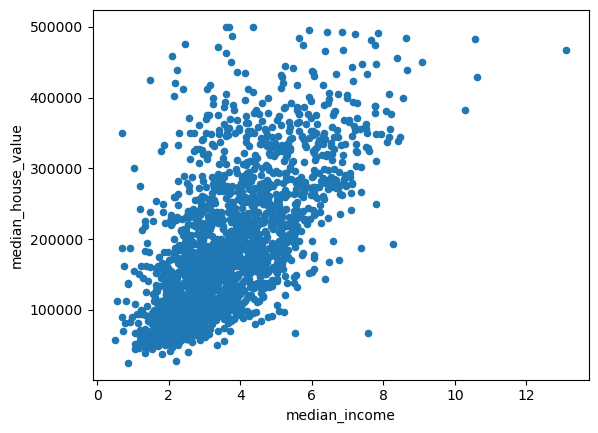

In [56]:
stratified_sampling.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

층화표집으로 생성된 표본의 경우도 불편분산이 모집단의 (편향)분산에 보다 가깝다.
하지만 무작위 추출로 생성된 표본의 분산보다는 작다.

- 표본의 불편분산

In [57]:
stratified_sampling.iloc[:, :2].var()

median_income         2.388555e+00
median_house_value    9.339549e+09
dtype: float64

In [58]:
random_sampling.iloc[:, :2].var()

median_income         2.535877e+00
median_house_value    1.027417e+10
dtype: float64

- 표본의 편향분산

In [59]:
stratified_sampling.iloc[:, :2].var(ddof=0)

median_income         2.387340e+00
median_house_value    9.334799e+09
dtype: float64

In [60]:
random_sampling.iloc[:, :2].var(ddof=0)

median_income         2.534588e+00
median_house_value    1.026895e+10
dtype: float64

- 모집단의 (편향)분산

In [61]:
housing.iloc[:, :2].var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

## 연습문제

참고: [(연습) 모집단과 표본](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling.ipynb)